# Python project
The purpose and goal with the analysis is to explore functions and syntax in python, 

to find information in the data and to be familiar with the fundamental basics infrastructures within python.

The report has conducted findings and insights.

starting with the essentials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns

Read data

In [2]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

In [3]:
newdf = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

In [4]:
df = newdf

# Describe Data set 
when describing the dataset we get a summary and overview on it's context

In [5]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [6]:
df.describe().round()

,close,amount
count,11968.0,11968.0
mean,253.0,104135.0
std,386.0,434652.0
min,21.0,1.0
25%,120.0,3008.0
50%,126.0,11637.0
75%,155.0,55862.0
max,1959.0,17085971.0


# Exchange Traded Fund
We can find information about the diffrent etf's and it's values

In [7]:
df['ex_symbol'].unique()

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [8]:
df['ex_symbol'].nunique()

10

In [9]:
df["ex_symbol"].value_counts()

l_igln      1289
l_gbsx      1289
l_sgld      1289
l_phau      1289
l_xgld      1289
l_sgbs      1280
s_zgldus    1279
s_csgold    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [10]:
df.groupby(['ex_symbol','datetime']).mean().unstack(0)

close                                                          \
ex_symbol   l_gbsx l_igln  l_phau  l_sgbs  l_sgld  l_xgld s_csgold  s_sgld   
datetime                                                                     
2016-01-04  102.54  21.26  103.78  105.05  105.53  105.82   105.54  105.91   
2016-01-05  102.82  21.32  104.23  105.32  105.81  106.08   105.43  105.65   
2016-01-06  103.97  21.55  105.45  106.52  107.06  107.29   106.63  106.80   
2016-01-07  105.51  21.87  106.93  108.09  108.57  108.86   108.27  108.39   
2016-01-08  105.29  21.83  106.73  107.88  108.36  108.64   107.90  108.23   
...            ...    ...     ...     ...     ...     ...      ...     ...   
2021-01-29  173.39  36.29  175.98  179.01  179.91  180.31   179.44  179.92   
2021-02-01  173.89  36.35  176.55  179.53  180.30  180.58   180.00  180.14   
2021-02-02  171.48  35.89  174.06  177.19  177.91  178.22   177.64  177.90   
2021-02-03  171.33  35.89  173.93  176.86  177.79  178.32   177.40  177.34   
2021-02-04  166.91  34.95  169.52  172.31  173.26  173.56   172.64  173.26   

                               amount                                         \
ex_symbol   s_xgld s_zgldus    l_gbsx    l_igln   l_phau   l_sgbs     l_sgld   
datetime                                                                       
2016-01-04  105.86  1048.21   35927.0   48848.0  33808.0   1567.0    24000.0   
2016-01-05     NaN  1046.98   33608.0    9965.0  36818.0  10031.0    83773.0   
2016-01-06     NaN  1060.15   64732.0   46331.0  64272.0  18042.0  1111497.0   
2016-01-07     NaN  1076.09   98517.0   32573.0  76768.0   3894.0  1777423.0   
2016-01-08  107.46  1072.90  126175.0   11128.0  26347.0  53428.0   137534.0   
...            ...      ...       ...       ...      ...      ...        ...   
2021-01-29  179.70  1767.80   21223.0  597622.0  32265.0   9106.0   102532.0   
2021-02-01  181.18  1770.60    7814.0  489657.0  27440.0   3394.0    38422.0   
2021-02-02  177.74  1751.00   18496.0  170826.0  17446.0   7886.0    21356.0   
2021-02-03     NaN  1748.20    9872.0  257208.0  21328.0   1895.0    26805.0   
2021-02-04  173.56  1703.60   23698.0  823755.0  36196.0  20074.0   354292.0   

                                                        
ex_symbol    l_xgld s_csgold   s_sgld  s_xgld s_zgldus  
datetime                                                
2016-01-04   4897.0   4263.0   8163.0  2000.0    542.0  
2016-01-05   3206.0   1110.0   8000.0     NaN   2986.0  
2016-01-06   7774.0   6468.0  33995.0     NaN   4357.0  
2016-01-07    166.0   2941.0  11758.0     NaN  12058.0  
2016-01-08   3284.0   7154.0   6487.0   600.0   1862.0  
...             ...      ...      ...     ...      ...  
2021-01-29   4480.0  13010.0  14462.0    76.0   6620.0  
2021-02-01   7522.0  15816.0  18959.0   526.0   2723.0  
2021-02-02   3892.0   3675.0  12561.0   190.0   1688.0  
2021-02-03   2274.0   2783.0  11332.0     NaN   1421.0  
2021-02-04  13199.0   2963.0  18542.0  4200.0   4301.0  

[1305 rows x 20 columns]

In [11]:
df1 = df.groupby(['ex_symbol','datetime'])['close'].mean().unstack(0) 
df1

ex_symbol,l_gbsx,l_igln,l_phau,l_sgbs,l_sgld,l_xgld,s_csgold,s_sgld,s_xgld,s_zgldus
datetime,,,,,,,,,,
2016-01-04,102.54,21.26,103.78,105.05,105.53,105.82,105.54,105.91,105.86,1048.21
2016-01-05,102.82,21.32,104.23,105.32,105.81,106.08,105.43,105.65,NaN,1046.98
2016-01-06,103.97,21.55,105.45,106.52,107.06,107.29,106.63,106.80,NaN,1060.15
2016-01-07,105.51,21.87,106.93,108.09,108.57,108.86,108.27,108.39,NaN,1076.09
2016-01-08,105.29,21.83,106.73,107.88,108.36,108.64,107.90,108.23,107.46,1072.90
...,...,...,...,...,...,...,...,...,...,...
2021-01-29,173.39,36.29,175.98,179.01,179.91,180.31,179.44,179.92,179.70,1767.80
2021-02-01,173.89,36.35,176.55,179.53,180.30,180.58,180.00,180.14,181.18,1770.60
2021-02-02,171.48,35.89,174.06,177.19,177.91,178.22,177.64,177.90,177.74,1751.00


In [12]:
df1.dtypes

ex_symbol
l_gbsx      float64
l_igln      float64
l_phau      float64
l_sgbs      float64
l_sgld      float64
l_xgld      float64
s_csgold    float64
s_sgld      float64
s_xgld      float64
s_zgldus    float64
dtype: object

In [13]:
df1.dtypes.index

Index(['l_gbsx', 'l_igln', 'l_phau', 'l_sgbs', 'l_sgld', 'l_xgld', 's_csgold',
       's_sgld', 's_xgld', 's_zgldus'],
      dtype='object', name='ex_symbol')

# matplotlib
with these timeserie analyses we get an overview on the amount and close during the time interval. 

<AxesSubplot:xlabel='datetime'>

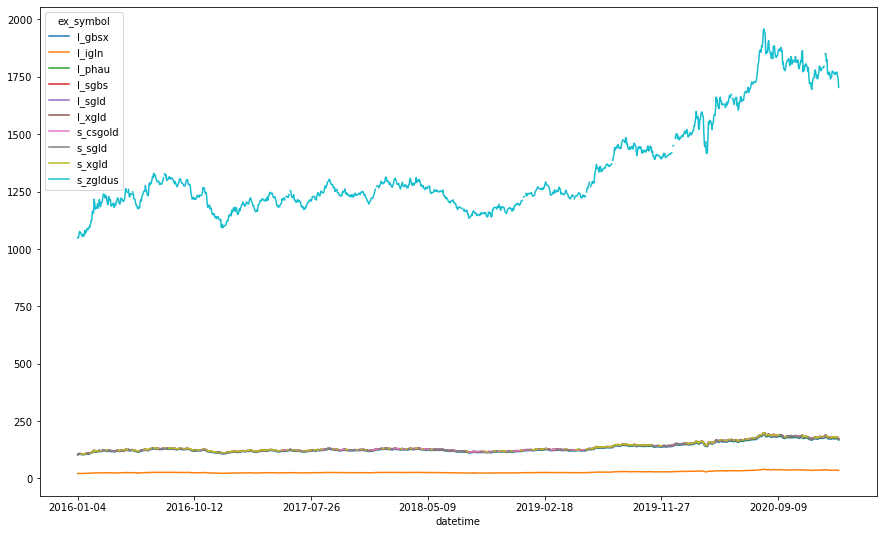

In [14]:
df1.plot(figsize = (15,9))

<AxesSubplot:xlabel='datetime'>

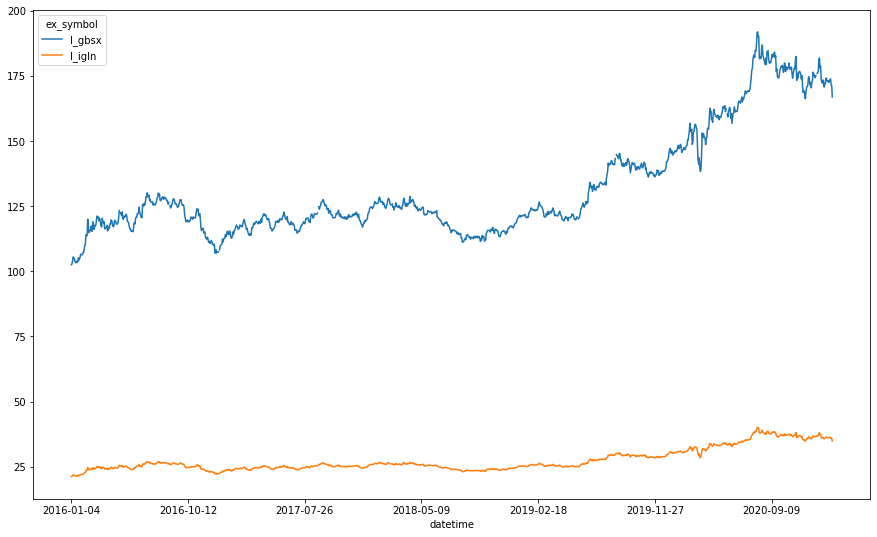

In [15]:
df1[['l_gbsx', 'l_igln']].plot(figsize = (15,9))

In [16]:
newdf1 = newdf.groupby(['ex_symbol','datetime'])['amount'].mean().unstack(0)
newdf1

ex_symbol,l_gbsx,l_igln,l_phau,l_sgbs,l_sgld,l_xgld,s_csgold,s_sgld,s_xgld,s_zgldus
datetime,,,,,,,,,,
2016-01-04,35927.0,48848.0,33808.0,1567.0,24000.0,4897.0,4263.0,8163.0,2000.0,542.0
2016-01-05,33608.0,9965.0,36818.0,10031.0,83773.0,3206.0,1110.0,8000.0,NaN,2986.0
2016-01-06,64732.0,46331.0,64272.0,18042.0,1111497.0,7774.0,6468.0,33995.0,NaN,4357.0
2016-01-07,98517.0,32573.0,76768.0,3894.0,1777423.0,166.0,2941.0,11758.0,NaN,12058.0
2016-01-08,126175.0,11128.0,26347.0,53428.0,137534.0,3284.0,7154.0,6487.0,600.0,1862.0
...,...,...,...,...,...,...,...,...,...,...
2021-01-29,21223.0,597622.0,32265.0,9106.0,102532.0,4480.0,13010.0,14462.0,76.0,6620.0
2021-02-01,7814.0,489657.0,27440.0,3394.0,38422.0,7522.0,15816.0,18959.0,526.0,2723.0
2021-02-02,18496.0,170826.0,17446.0,7886.0,21356.0,3892.0,3675.0,12561.0,190.0,1688.0


<AxesSubplot:xlabel='datetime'>

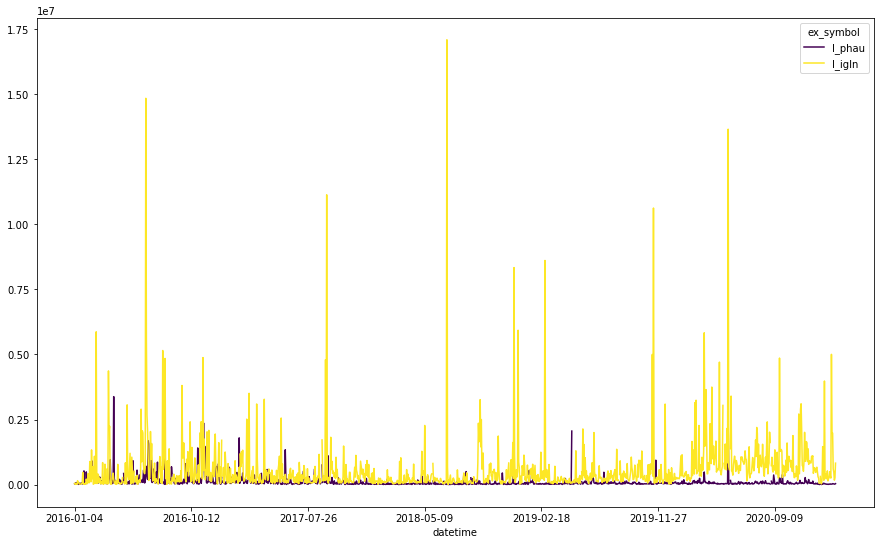

In [17]:
newdf1[['l_phau', 'l_igln']].plot(figsize = (15,9), colormap='viridis')

In [18]:
newdf['datetime'] = pd.to_datetime(newdf['datetime'])

<AxesSubplot:xlabel='datetime'>

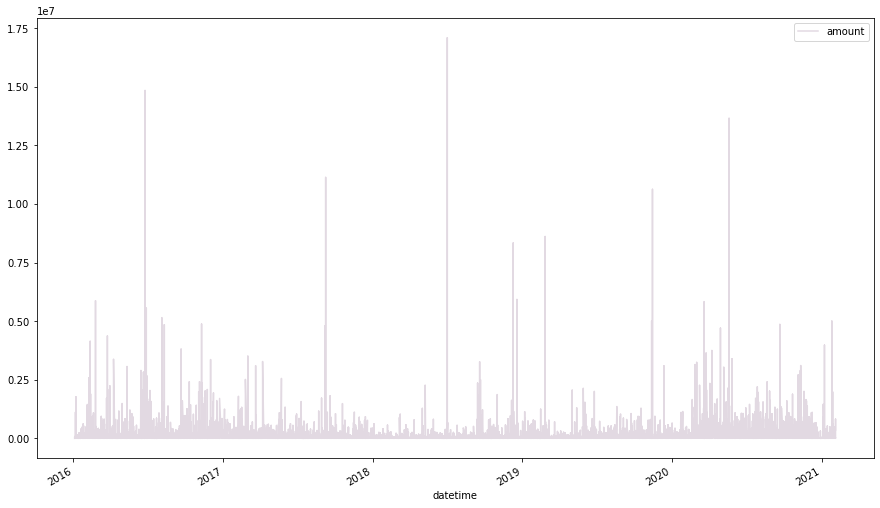

In [19]:
newdf.plot.line(x='datetime', y='amount', colormap='twilight', grid=False, figsize = (15,9))

Histogram with seaborn

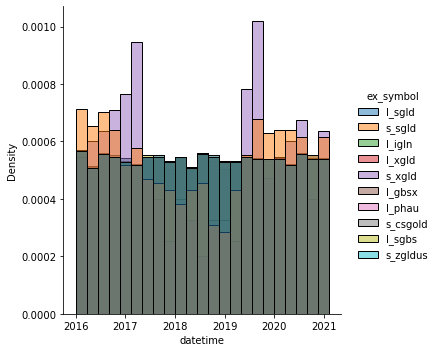

In [20]:
sns.displot(newdf, x="datetime", hue="ex_symbol", stat="density", common_norm=False)

Barplot

Text(0, 0.5, 'Value')

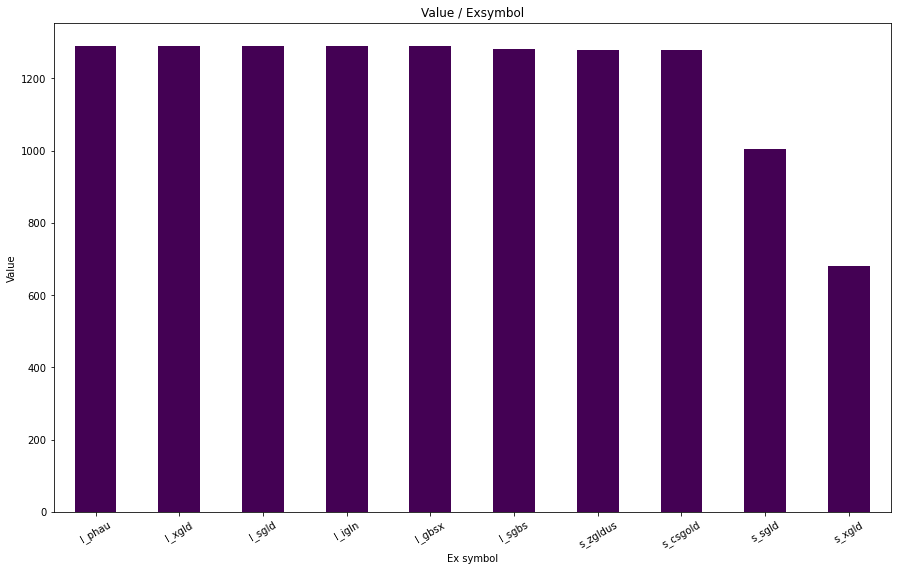

In [21]:
plotdata = pd.DataFrame(
    {"value": [1289,1289,1289,1289,1289,1280,1279,1279,1005,680]}, 
    index=['l_phau','l_xgld','l_sgld','l_igln','l_gbsx','l_sgbs','s_zgldus','s_csgold','s_sgld','s_xgld'])

plotdata['value'].plot(kind="bar", title="test", figsize = (15,9), colormap='viridis')
plt.title("Value / Exsymbol")
plt.xlabel("Ex symbol")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Value")

Hexbin

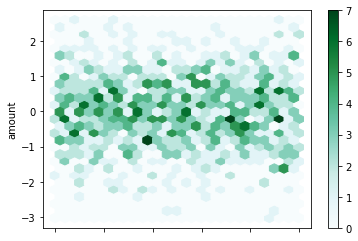

In [217]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["datetime", "amount"])

df["datetime"] = df["amount"] + np.arange(1000) 

df.plot.hexbin(x="datetime", y="amount", gridsize=25);

Subplot

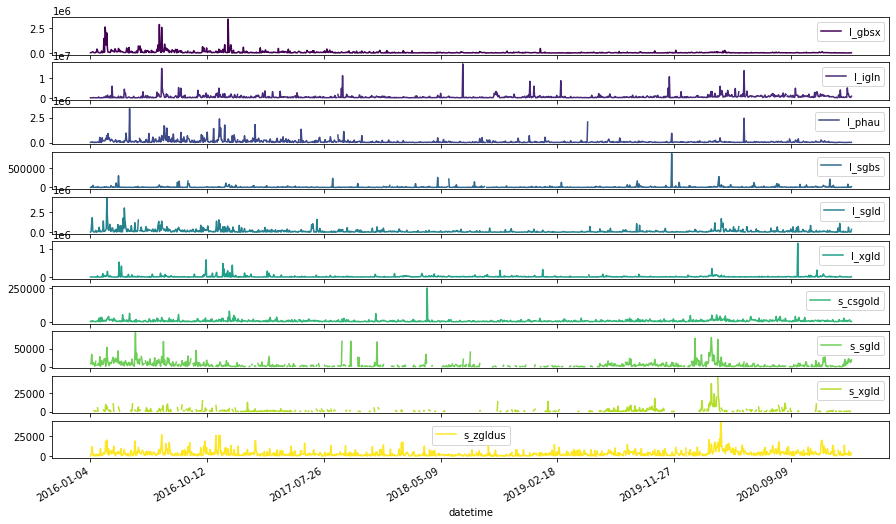

In [218]:
newdf1.plot(subplots=True, colormap='viridis', figsize=(15,9));

# 
normal distribution

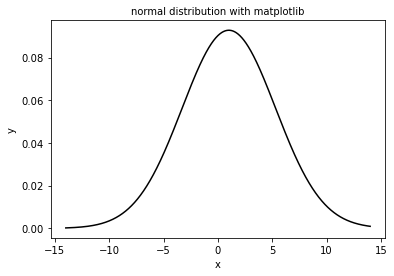

In [48]:
x = np.arange(-14, 14, 0.0014)

y = scipy.stats.norm.pdf(x,1.0,4.3)

plt.title('normal distribution with matplotlib',fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("normal.png")
plt.plot(x,y, color='black')

the x axis shows the linespace between the amounts min and max
and the y axis is defined with the mean and standard deviation of amount. 
 The plot becomes like this and if comparing this plot to the histogram we can see some similarities. 

close values 

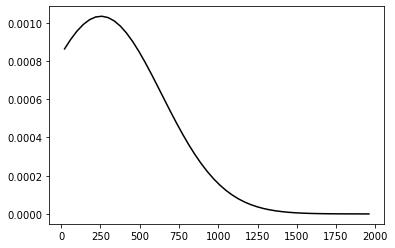

In [49]:
x = np.linspace(21.2, 1959.0)

y = scipy.stats.norm.pdf(x,253.1,385.8)

plt.plot(x,y, color='black')

amount values

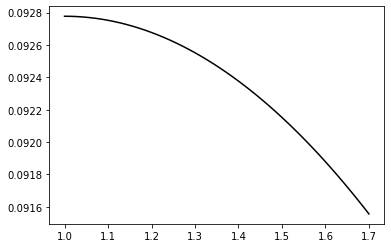

In [50]:
x = np.linspace(1.0, 1.7)

y = scipy.stats.norm.pdf(x,1.0,4.3)

plt.plot(x,y, color='black')

# In next week

Time series analysis, Selecting specific time(one year or by monthly) gropuby  

Indexing

Heatmap